In [10]:
#Linear Regression Model to predict housing price
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
bostonTrain = pd.read_csv("boston_train.csv")

In [19]:
bostonTrain.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [22]:
bostonTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [23]:
bostonTrain.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [24]:
bostonTrain.drop('ID', axis=1, inplace = True)

# Data Analysis and Preprocessing

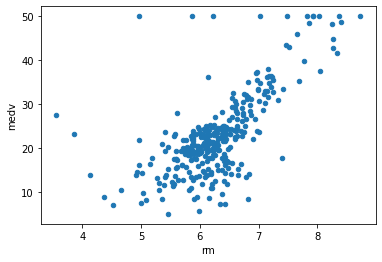

In [30]:
bostonTrain.plot.scatter('rm', 'medv') #average number of rooms per dwelling has linear relation with median value of homes

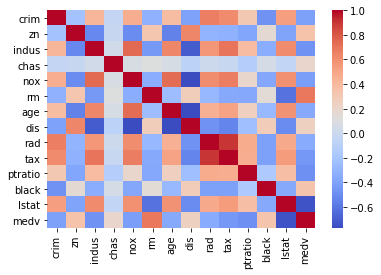

In [41]:
sns.heatmap(bostonTrain.corr(), cmap = 'coolwarm') #plotting the correlation of all features with all features, we look especially at the last column

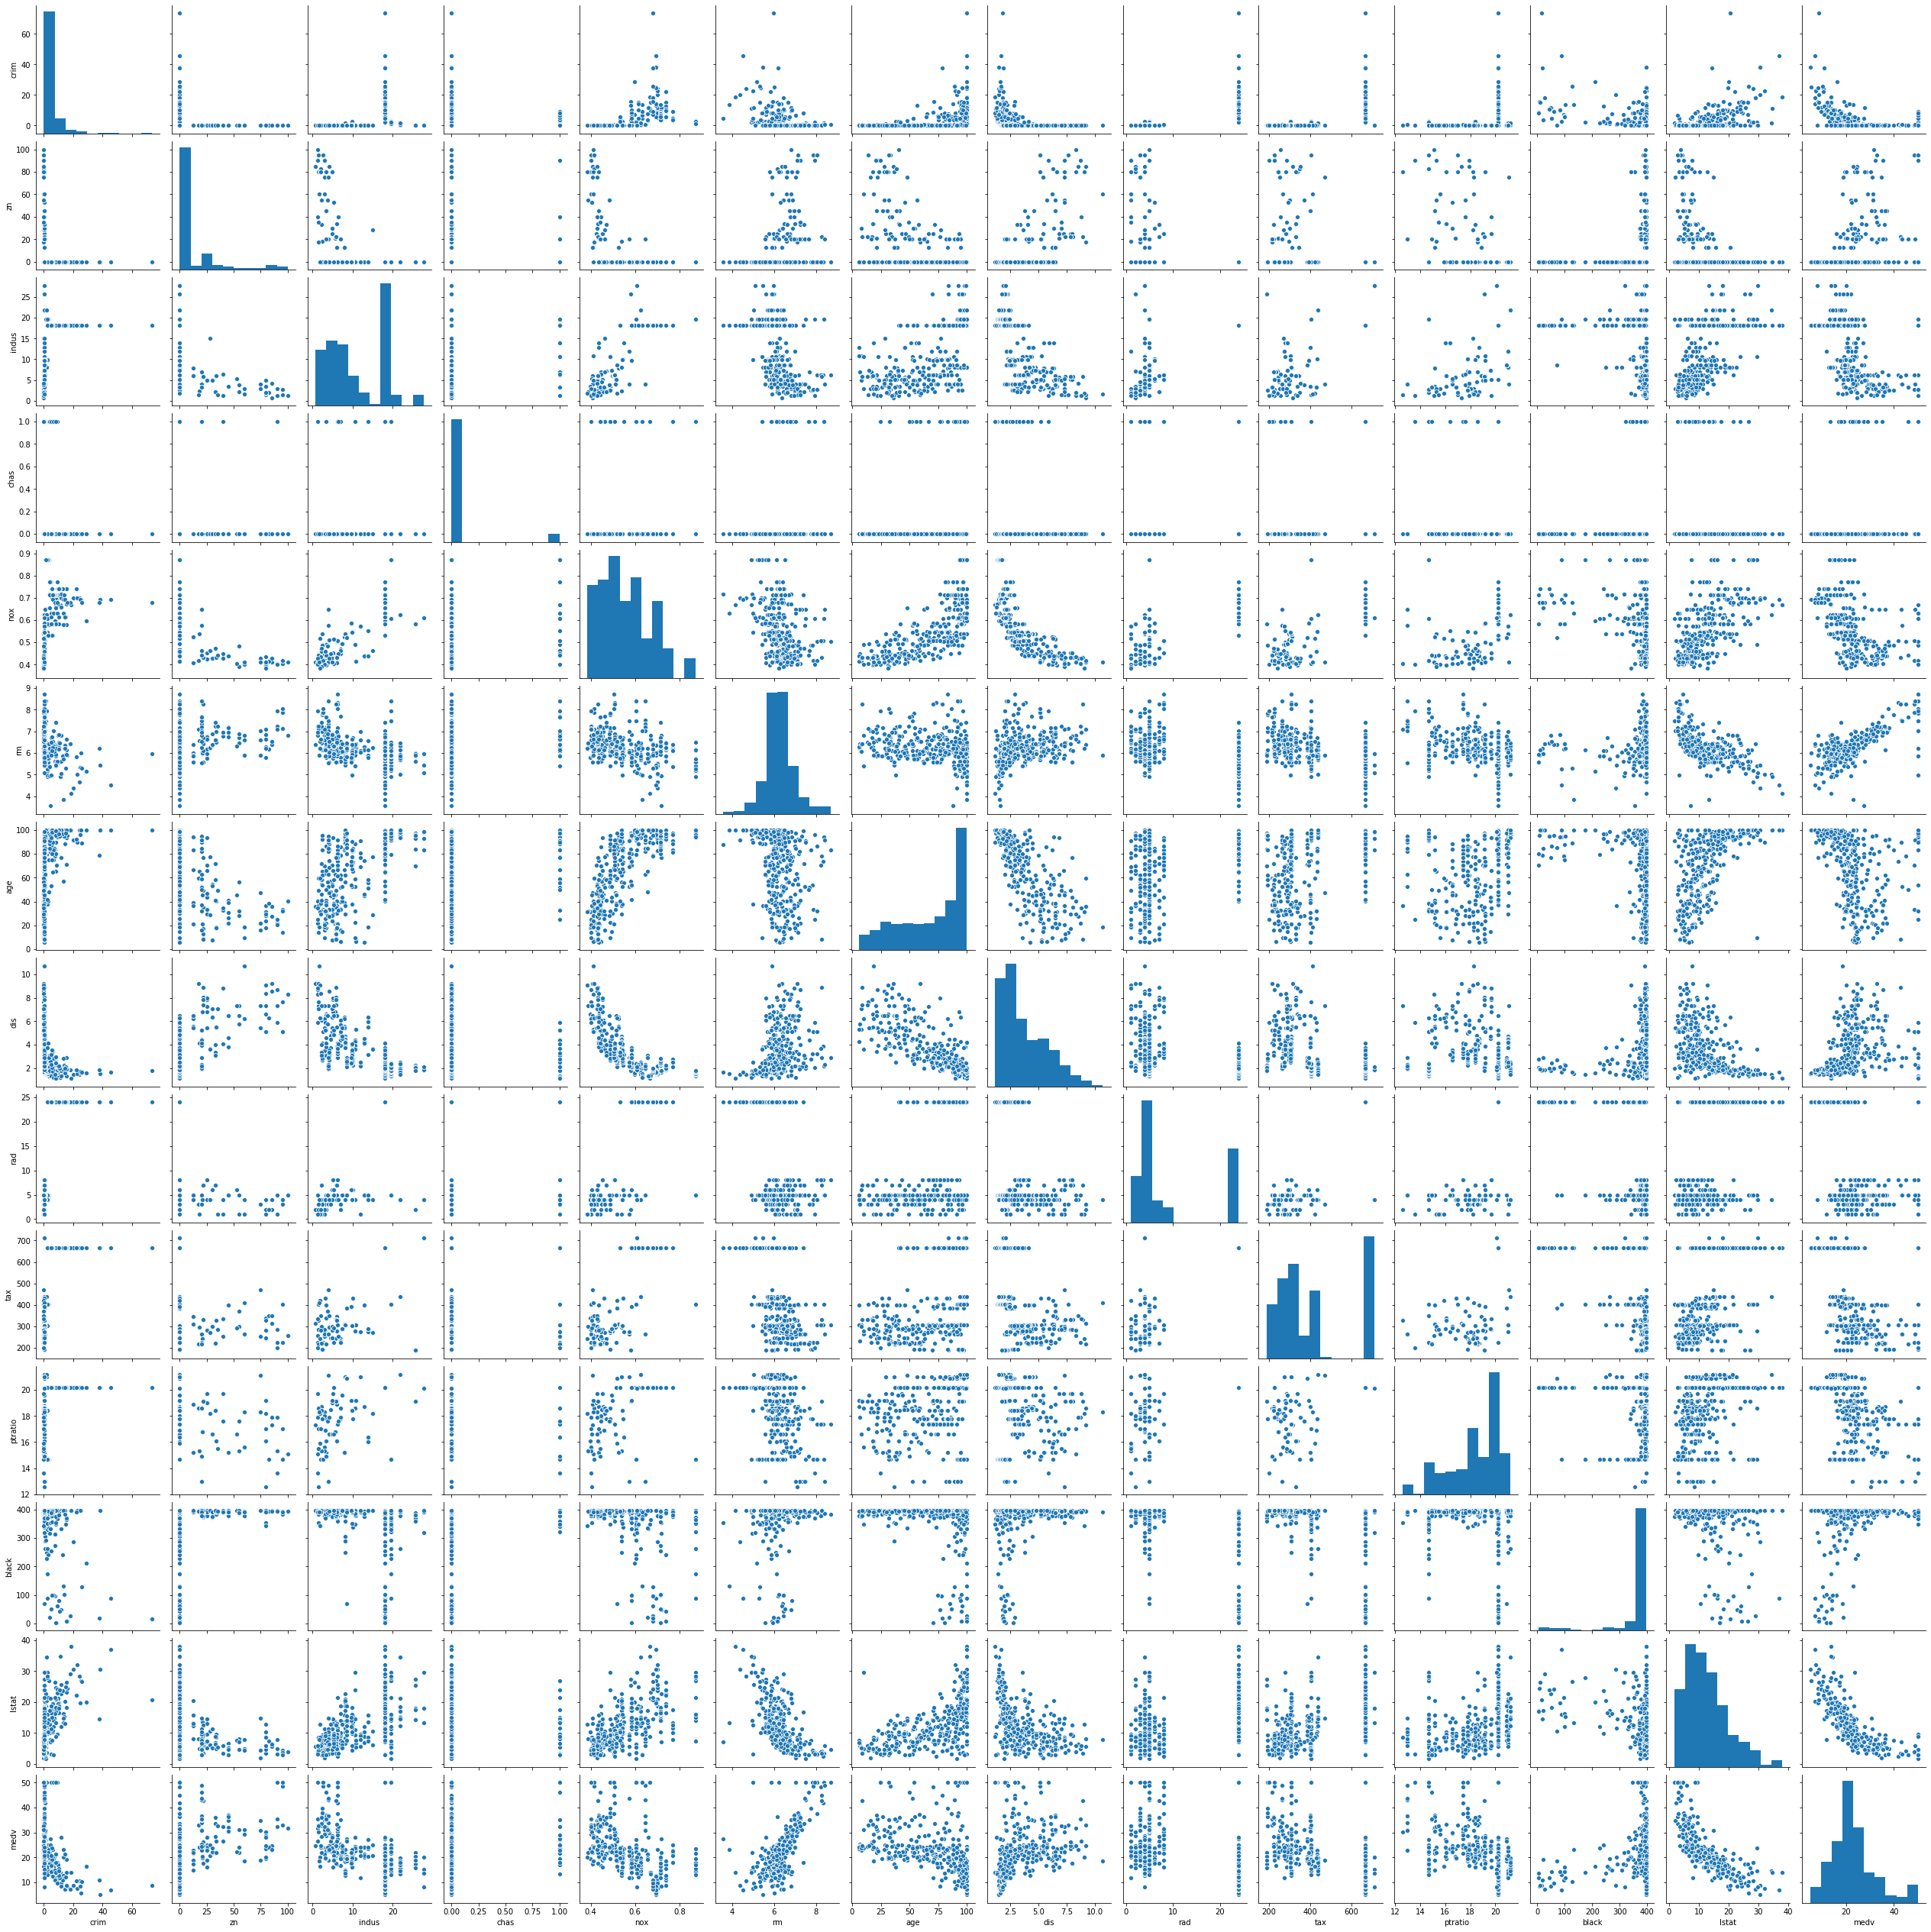

In [42]:
sns.pairplot(bostonTrain, palette='viridis') #Visualising the relationship of all features with all features

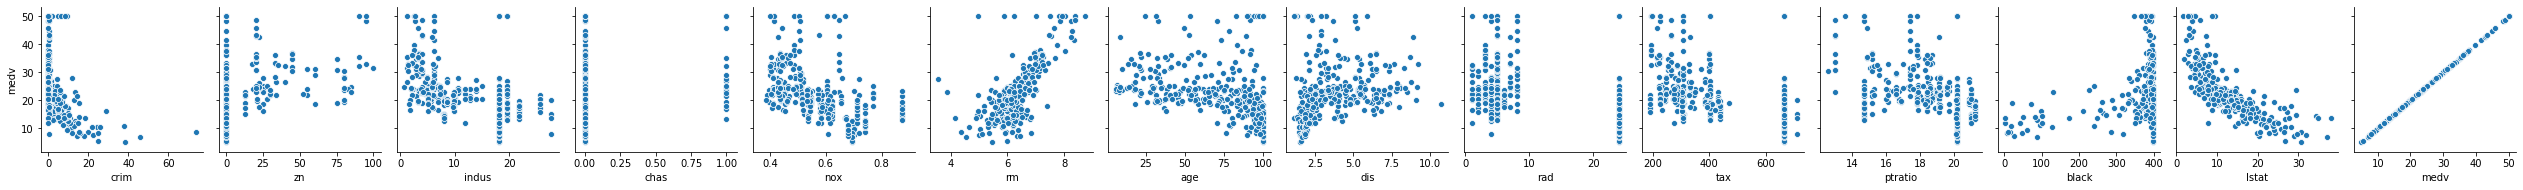

In [50]:
#Now, specifically looking at the target variable and other features horizontally
sns.pairplot(bostonTrain, y_vars=['medv'], x_vars=bostonTrain.columns)

# Training Linear Regression Model

In [86]:
X_train = bostonTrain[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']]
y_train = bostonTrain['medv']

In [87]:
#Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [88]:
#Splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [89]:
#Fitting the model
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
#Predicting values for test data
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

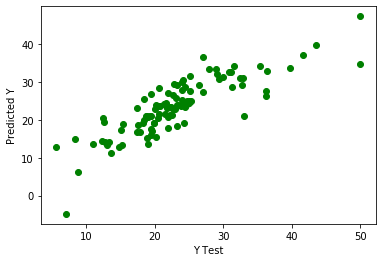

In [91]:
#Plotting the predicted values vs true values
plt.scatter(y_test,predictions,c='green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [95]:
#Evaluating using metrics

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions).round(2))
print('MSE:', metrics.mean_squared_error(y_test, predictions).round(2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)).round(2))

MAE: 3.11
MSE: 17.89
RMSE: 4.23


In [85]:
#Importing test dataset and predicting on unseen data

bostonTest = pd.read_csv("boston_test.csv")
final = bostonTest[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']]
predictions = lm.predict(final)
predictions

array([31.37063123, 25.36964699, 17.53831011,  8.08759046, 17.05863734,
       16.11831741, 18.24298951, 14.44609769, 11.94470515, 14.28776351,
       18.83163606, 20.49813726,  6.3767382 , 12.87887974, 23.94219651,
       22.32792579, 23.61544471, 29.34343598,  5.60638776, 28.03442358,
       20.21821129, 23.10215064, 21.16215281, 22.40744895, 21.59189919,
       23.466431  , 26.55182389, 28.0612624 , 29.05898176, 29.72119829,
       37.36811667, 37.37078118, 33.65496639, 21.68351864, 18.22514349,
       21.36279569, 20.7200904 , 20.54066176, 20.36107949, 21.10714565,
       13.45234056, 20.12166614, 20.23878252, 16.88591766, 12.56210897,
       10.57812665,  6.59043432, 14.52531884, 17.62950052, 22.25148251,
       21.96472604, 34.49164404, 45.04383558, 26.65678678, 21.77522097,
       24.36085015, 33.9801287 , 41.55982969, 36.62939337, 34.84684458,
       30.71416763, 38.3804313 , 16.64754023, 17.45072872, 23.75066764,
       24.92308228, 25.00004482, 28.14533037, 26.25965546, 31.83